In [1]:
import matplotlib.pyplot as plt

In [2]:
#Đọc tất cả các file result.json trong thư mục server_results và lấy ra các giá trị aggregated_accuracy và aggregated_loss của server
import os
import json
results=[]
dir_names=[]
for (root,dirs,files) in os.walk('./server//server_results', topdown=True): 
    for dir in dirs:
        result_path=os.path.join(root,dir,'result.json')
        if os.path.exists(result_path):
            with open(result_path) as f:
                data = json.load(f)
                #take only aggregated_accuracy and aggregated_loss of server
                loss=data['aggregated_loss']['server']
                accuracy=data['aggregated_accuracy']['server']
                arr=[]
                arr.append(accuracy)
                arr.append(loss)
                results.append(arr)
                dir_names.append(dir)
print(results)
print(dir_names)


[[{'1': 0.7310267686843872, '2': 0.8772321343421936, '3': 0.9162946343421936, '4': 0.9319196343421936, '5': 0.9441964030265808, '6': 0.9430803656578064, '7': 0.9486607313156128, '8': 0.9497767686843872, '9': 0.9520089030265808, '10': 0.953125}, {'1': 0.8797914385795593, '2': 0.6033390164375305, '3': 0.608090877532959, '4': 0.49231404066085815, '5': 0.4826153814792633, '6': 0.42670145630836487, '7': 0.5325559973716736, '8': 0.4576728343963623, '9': 0.47364237904548645, '10': 0.4752269387245178}], [{'1': 0.2734375, '2': 0.4910714328289032, '3': 0.1607142835855484, '4': 0.4676339328289032, '5': 0.2901785671710968, '6': 0.4910714328289032, '7': 0.2377232164144516, '8': 0.4910714328289032, '9': 0.234375, '10': 0.4910714328289032}, {'1': 35.930328369140625, '2': 63.35302734375, '3': 86.5206298828125, '4': 57.13296890258789, '5': 11.48632526397705, '6': 21.66212272644043, '7': 22.763381958007812, '8': 60.99160385131836, '9': 58.63223648071289, '10': 32.74702835083008}], [{'1': 0.5323660969734

In [3]:
#plot the graph comparing the accuracy and loss of each model in the server_result folder
def plot_graph(results, dir_names):
  #assign difference color for each bar
  colors=['#003f5c','#58508d','#bc5090','#ff6361','#ffa600','#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
  plt.figure(figsize=(16,8))
  #plot double bar charts for accuracy, loss
  plt.subplot(1,2,1)
  for i in range(len(results)):
    plt.plot(list(results[i][0].keys()), list(results[i][0].values()), color=colors[i], label=dir_names[i])
  plt.title('Accuracy')
  plt.xticks(range(0, 11))
  plt.legend()
  plt.subplot(1,2,2)
  for i in range(len(results)):
    plt.plot(list(results[i][1].keys()), list(results[i][1].values()), color=colors[i], label=dir_names[i])
  plt.title('Loss')
  plt.xticks(range(0, 10))
  plt.legend()
  plt.tight_layout()
  plt.show()

## IID so sánh giữa các trường hợp chạy DP

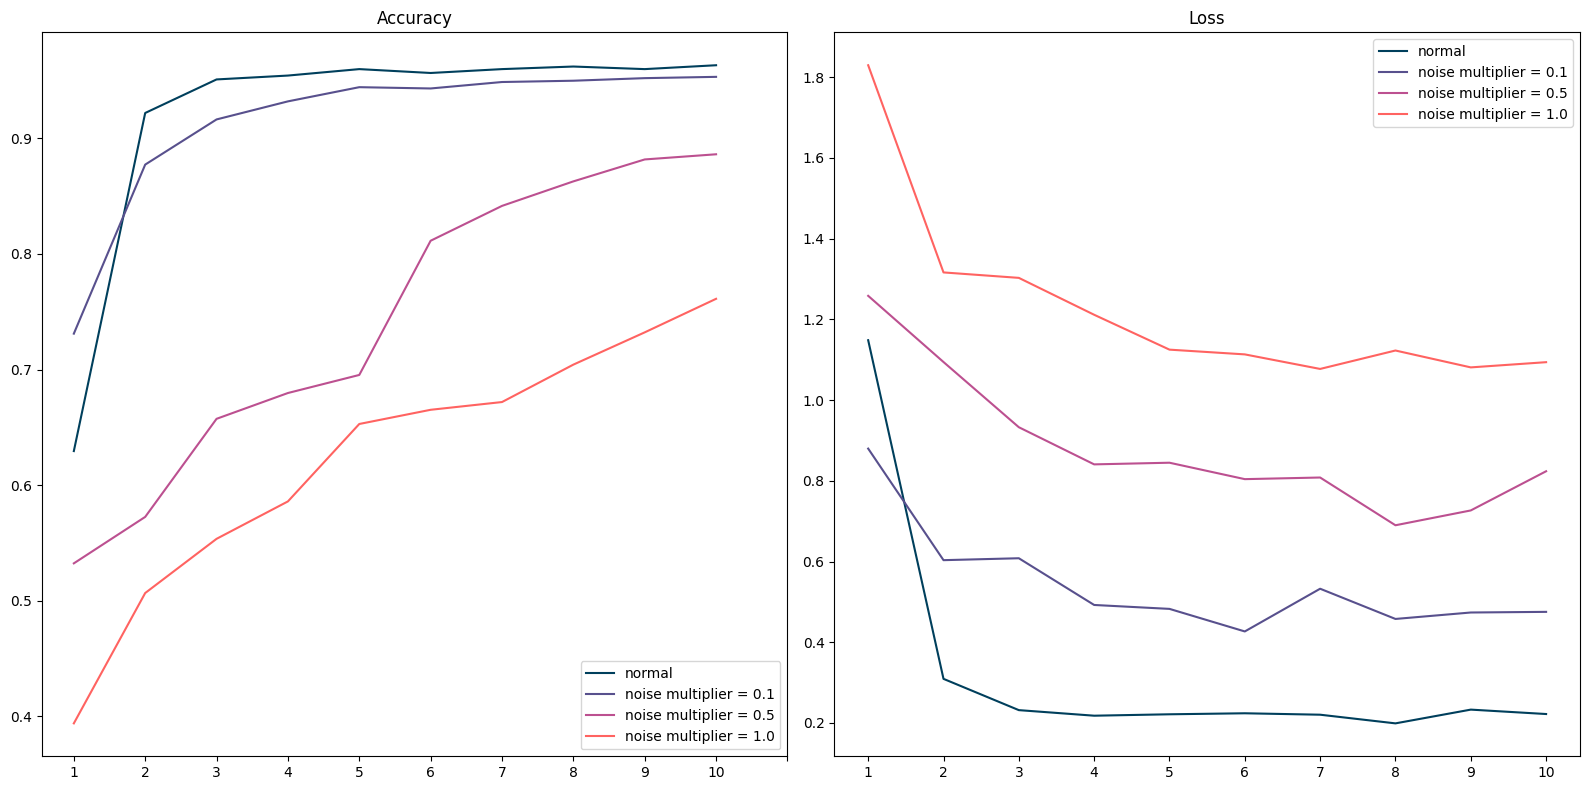

In [4]:
dp_folder=['normal','0.1_noise_iid','0.5_noise_iid','1.0_noise_iid']
name=['normal','noise multiplier = 0.1','noise multiplier = 0.5','noise multiplier = 1.0']
dp_result=[]
#Lấy ra các dp_folder từ folder và result
for i in range(len(dir_names)):
    for j in range(len(dp_folder)):
        if dp_folder[j] == dir_names[i]:
            dp_result.append(results[i])
            #Sắp xếp lại thứ tự của dp_result để giống thứ tự của dp_folder
            dp_result=sorted(dp_result, key=lambda x: dp_folder.index(dir_names[results.index(x)]))

#Chỉnh sửa lại tên của các folder như trong dp_folder
for i in range(len(dp_folder)):
    dp_folder[i]=name[i]
    
plot_graph(dp_result, dp_folder)

## Non IID so sánh giữa các trường hợp chạy DP

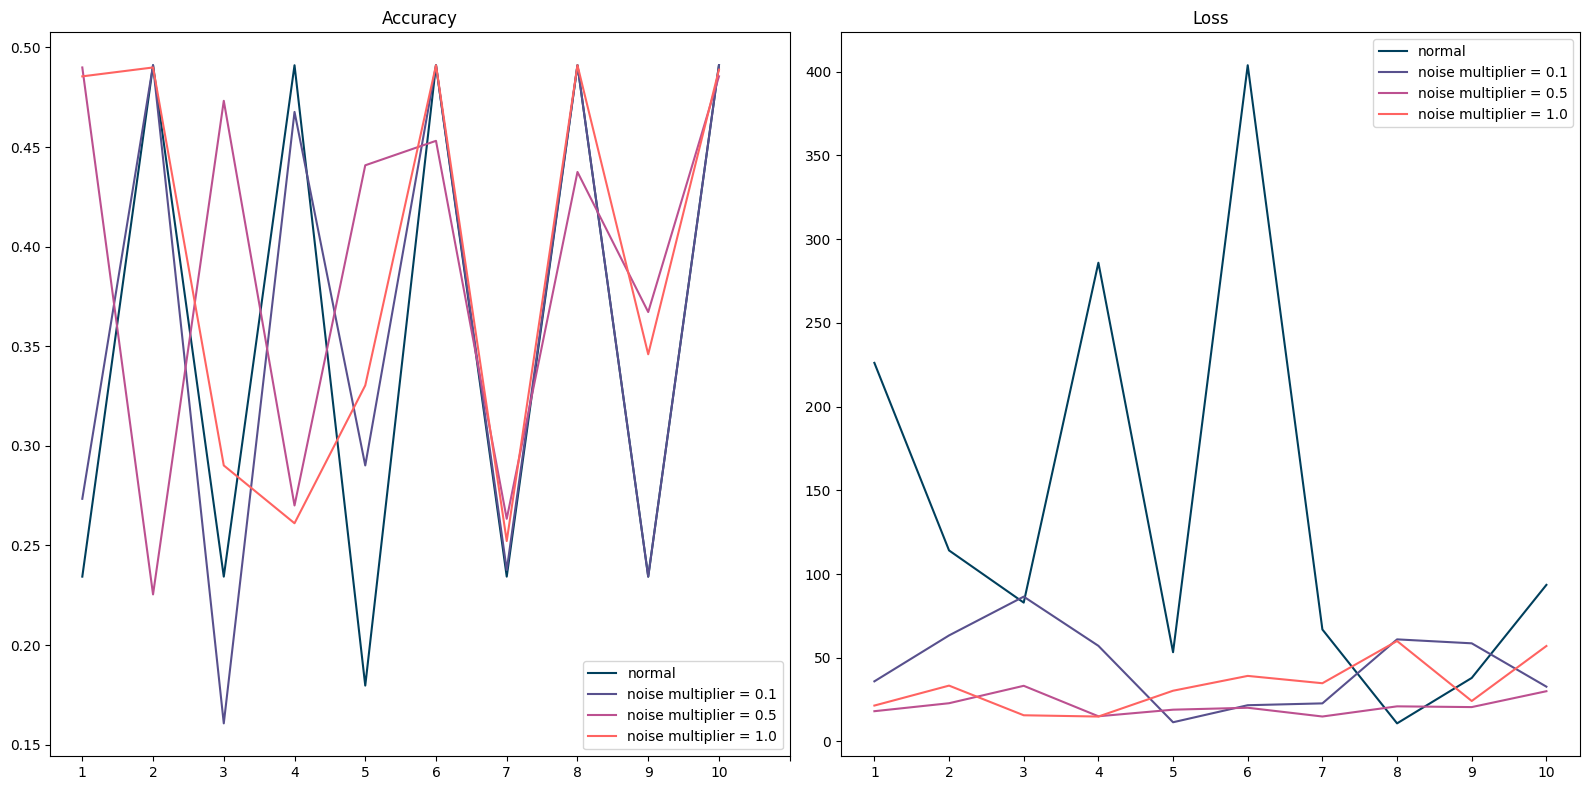

In [5]:
dp_folder=['normal_non_iid','0.1_noise_non_iid','0.5_noise_non_iid','1.0_noise_non_iid']
name=['normal','noise multiplier = 0.1','noise multiplier = 0.5','noise multiplier = 1.0']
dp_result=[]
#Lấy ra các dp_folder từ folder và result
for i in range(len(dir_names)):
    for j in range(len(dp_folder)):
        if dp_folder[j] == dir_names[i]:
            dp_result.append(results[i])
            #Sắp xếp lại thứ tự của dp_result để giống thứ tự của dp_folder
            dp_result=sorted(dp_result, key=lambda x: dp_folder.index(dir_names[results.index(x)]))

#Chỉnh sửa lại tên của các folder như trong dp_folder
for i in range(len(dp_folder)):
    dp_folder[i]=name[i]
    
plot_graph(dp_result, dp_folder)

## IID so sánh giữa các trường hợp chạy DP với các phương pháp cân bằng như SMOTE, OS

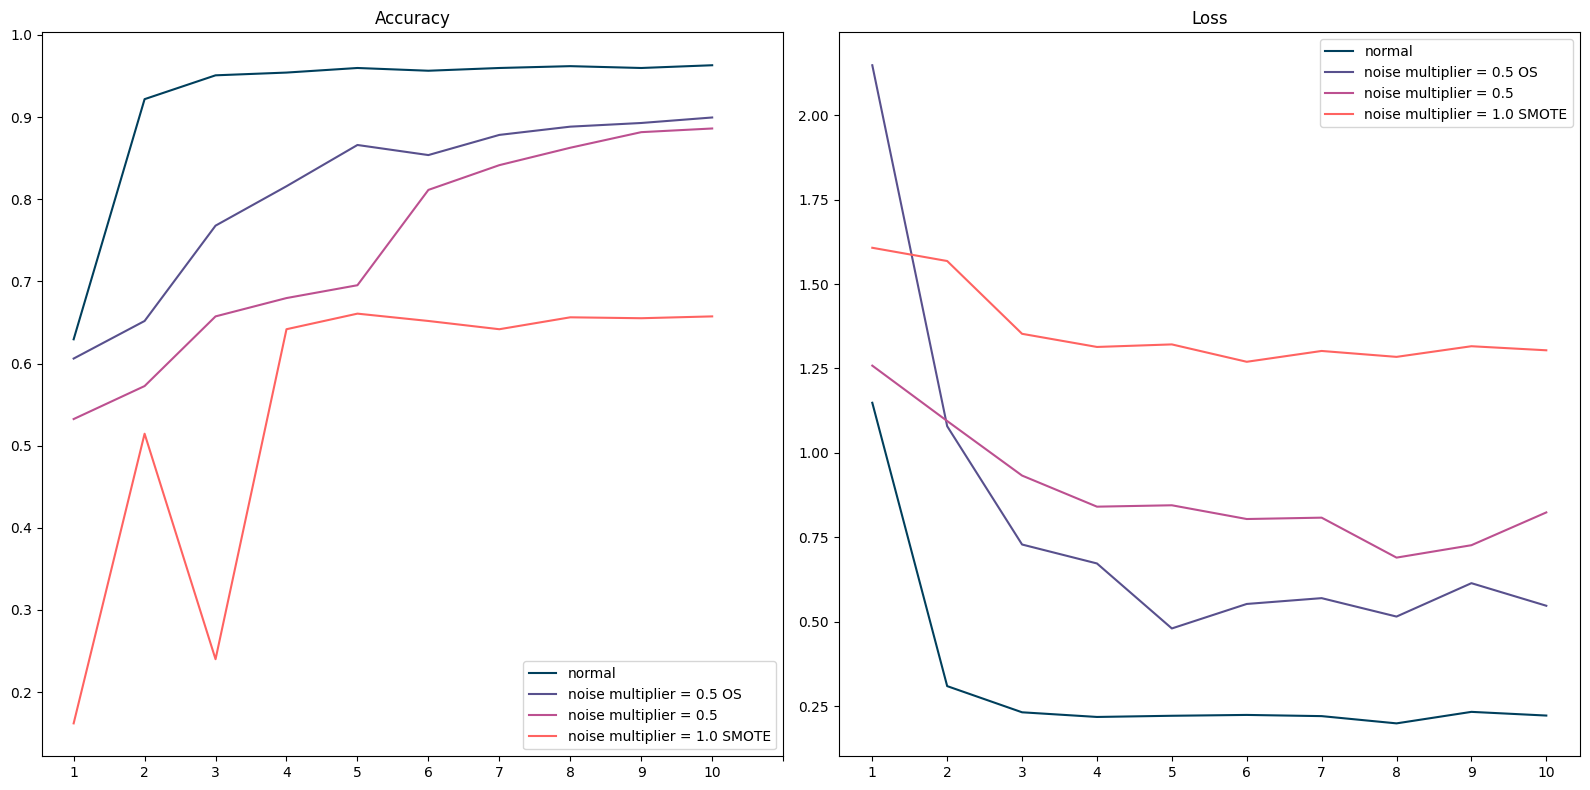

In [6]:
dp_folder=['normal','os_0.5_noise_iid','0.5_noise_iid','smote_0.5_noise_iid']
name=['normal','noise multiplier = 0.5 OS','noise multiplier = 0.5','noise multiplier = 1.0 SMOTE']
dp_result=[]
#Lấy ra các dp_folder từ folder và result
for i in range(len(dir_names)):
    for j in range(len(dp_folder)):
        if dp_folder[j] == dir_names[i]:
            dp_result.append(results[i])
            #Sắp xếp lại thứ tự của dp_result để giống thứ tự của dp_folder
            dp_result=sorted(dp_result, key=lambda x: dp_folder.index(dir_names[results.index(x)]))

#Chỉnh sửa lại tên của các folder như trong dp_folder
for i in range(len(dp_folder)):
    dp_folder[i]=name[i]
    
plot_graph(dp_result, dp_folder)

<h3>Vẽ biểu đồ chỉ so sánh kết quả cuối cùng với accuracy, loss của các session khác nhau</h3>

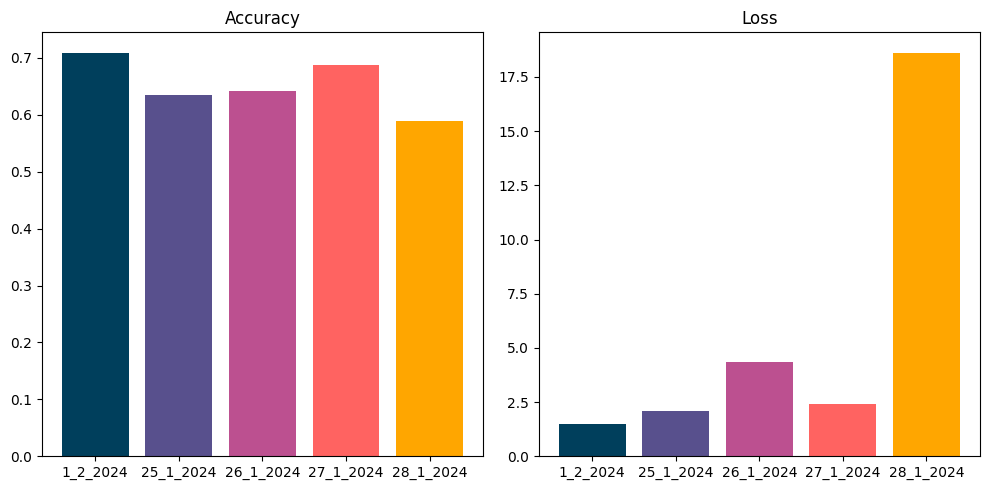

In [44]:
#plot the graph comparing the accuracy and loss of each model in the server_result folder
import matplotlib.pyplot as plt

#assign difference color for each bar
colors=['#003f5c','#58508d','#bc5090','#ff6361','#ffa600','#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
plt.figure(figsize=(10,5))
#plot double bar charts for accuracy, loss
plt.subplot(1,2,1)
plt.bar(dir_names,[result['aggregated_accuracy'] for result in results],color=colors)
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.bar(dir_names,[result['aggregated_loss'] for result in results],color=colors)
plt.title('Loss')
plt.tight_layout()
plt.show()